## Notebook : Brain Age Prediction




In [26]:
import pandas as pd
import numpy as np

# Read the CSV file into a DataFrame
df1 = pd.read_csv('/content/drive/MyDrive/MUSA650-Spring2024/BrainAgePrediction_TrainData/data/IXI_Train_RegionalVolumes.csv')

# Read the CSV file into a DataFrame
df2 = pd.read_csv('/content/drive/MyDrive/MUSA650-Spring2024/BrainAgePrediction_TrainData/data/IXI_Train_Demog.csv')

In [27]:
# Merge data
df = df2.merge(df1, on='ID')

In [35]:
# Show merged data
print(df.shape)
print(df.head())

(356, 263)
   ID  Sex_IsF    Age           702           701            600  \
0   2        1  35.80  1.351050e+06  1.215330e+06  135720.014078   
1  15        0  24.28  1.454786e+06  1.293679e+06  161107.098508   
2  16        0  55.17  1.400873e+06  1.233214e+06  167659.263623   
3  17        1  29.09  1.511537e+06  1.335242e+06  176294.378949   
4  20        0  39.47  1.502247e+06  1.334319e+06  167927.628458   

             601            604            606            607  ...  \
0  648458.231278  537896.670266  318034.951354  263471.883907  ...   
1  668104.080579  588369.498298  328876.675273  289567.315270  ...   
2  621162.774473  540318.959600  301166.729909  262184.469283  ...   
3  730593.403900  558884.811383  359495.914143  271043.392292  ...   
4  701136.344969  589213.772401  343241.246000  286630.798459  ...   

            198          199          200          201          202  \
0   9479.507678  9335.015850  6627.639770  7191.896179  8586.189587   
1   8963.812365  

In [29]:
import seaborn as sns

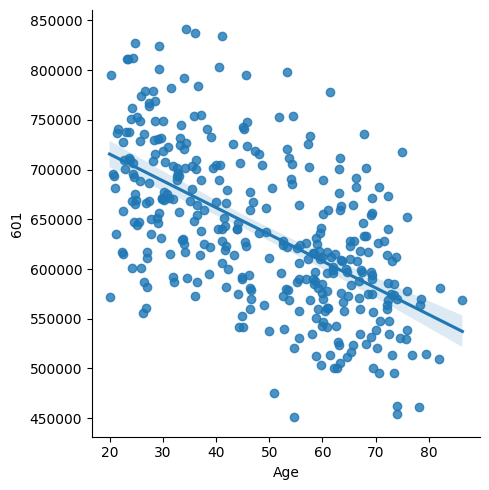

In [30]:
# Show an example plot for a single variable
sns.lmplot(data=df, x='Age', y='601')   ## 601: Index for total gray matter in brain

In [36]:
# Train a prediction model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = np.array(df.drop('Age', axis=1))      ## Optional:  remove np.array() and keep data as dataframe
y = np.array(df['Age'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

Training prediction corr.: 
[[1.         0.97219032]
 [0.97219032 1.        ]]
Training prediction mean absolute error (MAE): 
3.1248919475455565


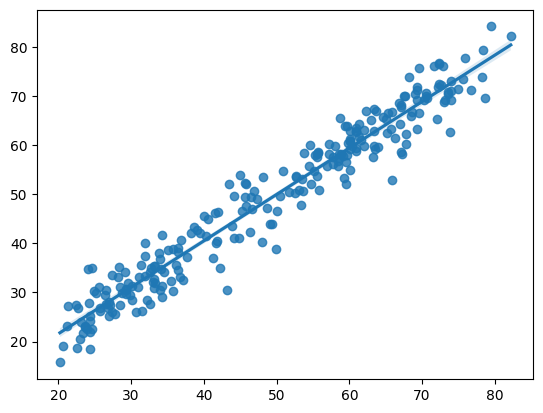

In [37]:
# Show training accuracy
y_train_pred = model.predict(X_train_scaled)

print('Training prediction corr.: ')
print(np.corrcoef(y_train, y_train_pred))

print('Training prediction mean absolute error (MAE): ')
print(np.abs(y_train - y_train_pred).mean())

sns.regplot(x = y_train, y = y_train_pred);

Testing prediction corr.: 
[[1.         0.85272878]
 [0.85272878 1.        ]]
Testing prediction mean absolute error (MAE): 
7.221109148640389


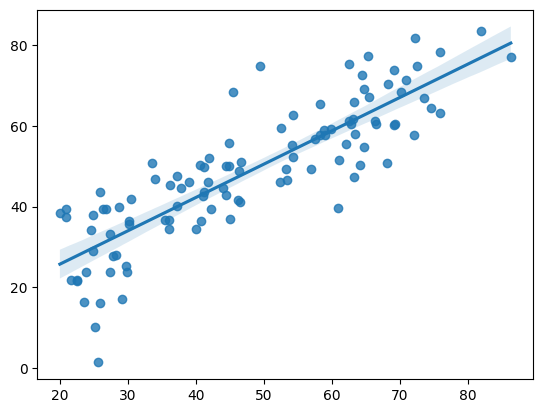

In [38]:
# Show testing accuracy
y_test_pred = model.predict(X_test_scaled)

print('Testing prediction corr.: ')
print(np.corrcoef(y_test, y_test_pred))

print('Testing prediction mean absolute error (MAE): ')
print(np.abs(y_test - y_test_pred).mean())

sns.regplot(x = y_test, y = y_test_pred);

In [39]:
# A fast way to evaluate the model on the test set:
print(f"R^2 score on test set: {model.score(X_test_scaled, y_test)}")


R^2 score on test set: 0.7107955805960998
